In [2]:
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
# # https://zhuanlan.zhihu.com/p/566430362
background_pattern =  ['#CCE0CC', '#ADD8E6', '#FFFFCC', '#FFCCCC']

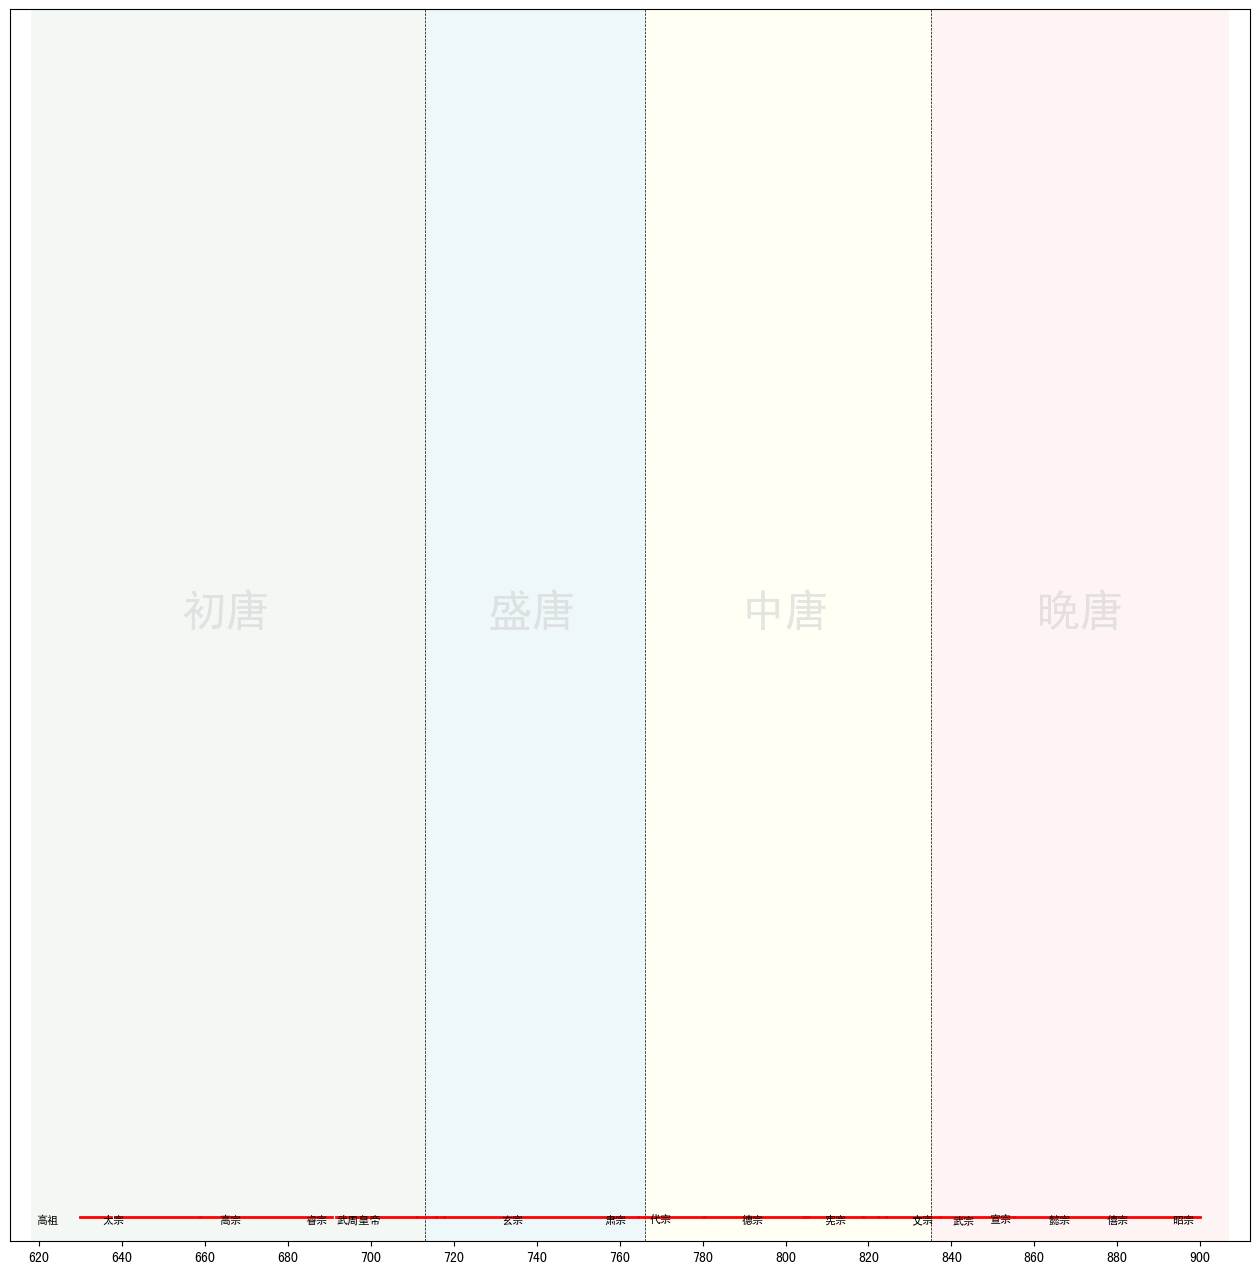

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.transforms import Affine2D, offset_copy

class HistoricalPeriodPlotter:
    def __init__(self, fig_size=(16, 16), xlim=(600, 920), ylim=(0,100), xticks=np.arange(600, 940, 20)):
        """
        初始化HistoricalPeriodPlotter类，创建一个新的figure和axes对象。

        参数:
        fig_size (tuple[int, int]): 图形的宽度和高度，默认为(16, 16)
        xlim (tuple[int, int]): 横轴的显示范围，默认为(600, 920)
        xticks (numpy.ndarray): 横轴刻度，默认每隔20年一个刻度
        """
        self.fig, self.ax = plt.subplots(figsize=fig_size)
        
        # 设置横轴基本样式
        self.ax.set_xlim(left=xlim[0], right=xlim[1])
        self.x0 = xlim[0]
        self.x1 = xlim[1]        
        self.ax.xaxis.set_ticks(xticks)
        self.ax.tick_params(labelbottom=True)
        # 不显示纵轴刻度
        self.ax.set_ylim(ylim[0], ylim[1])
        self.ax.yaxis.set_visible(False)
        self.y0 = ylim[0]
        self.y1 = ylim[1]
        
        # 获取当前图表的宽度和高度
#         self.height = self.fig.get_figheight()
#         self.width  = self.fig.get_figwidth()
#         self.dpi = self.fig.dpi  # 获取每英寸点数
#         self.height_pixels = self.height * self.dpi
#         self.width_pixels  = self.width  * self.dpi
               
        #print(f"height = {self.height}, width = {self.width}, dpi = {self.dpi}")
        
    
    def put_text(self, text='Test', pos = (0.1, 0.1), ha = 'center', va = 'bottom' ):      
        self.ax.text(pos[0], pos[1], text, ha=ha, va=va, transform=self.ax.transAxes)
    
    def draw_xline(self, y = 10, x = (635, 660), color = 'red', lwidth = 2 ):
#         self.ax.axhline(y = 0.2, xmin=0.2, xmax=0.4, color = 'r', linestyle = '-') 
        yd = (y- self.y0)/(self.y1-self.y0)
        x0 = (x[0]-self.x0)/(self.x1-self.x0)
        x1 = (x[1]-self.x0)/(self.x1-self.x0)
        # print(f"yd = {yd}, x0 = {x0}, x1 = {x1}")
        # 有点怪， y用整数， x用小数
        self.ax.axhline(y=y, xmin=x0, xmax=x1, color=color, linewidth=lwidth)  
        # not work
        # self.ax.axhline(y=y, xmin=x[0], xmax=x[1], color=color, linewidth=lwidth)   

    def plot_periods_from_csv(self, file_name, colors):
        """
        从指定的CSV文件中读取数据并绘制历史时期背景。

        参数:
        file_name (str): CSV文件路径
        colors (list[str]): 颜色列表，用于填充各个时期
        """
        df = pd.read_csv(file_name)
        
        periods = df[['起始年代', '结束年代']].values
        
        for i, (start, end) in enumerate(periods):
            self.ax.axvspan(start, end, facecolor=colors[i], alpha=0.2)

        x_pos = (df['起始年代'] + df['结束年代']) // 2
        y_pos = (self.y0 + self.y1) // 2
        for i, x_pos in enumerate(x_pos):
            period_name = df.iloc[i]['时期']
            self.ax.text(x_pos, y_pos, period_name,
                         ha='center', fontsize=32, color='lightgray', alpha=0.6,
                         rotation=90 if len(period_name) > 4 else 0)

        # 可选：添加竖直虚线作为区分
        for start, end in zip(periods[:-1, 1], periods[1:, 0]):
            self.ax.axvline(x=start, color='black', linewidth=0.5, linestyle='--')

    def set_title_and_xlabel(self, title='历史时期划分', xlabel='年份'):
        """
        设置图形的标题和横轴标签
        """
        self.ax.set_title(title)
        self.ax.set_xlabel(xlabel)

    def show_plot(self):
        """
        显示图形
        """
        plt.show()
        
    def plot_emperors_from_csv(self, emperor_file_name, y_offset=1, color='black'):
        """
        从指定的CSV文件中读取皇帝在位数据并在第一个坐标轴上方绘制线段及庙号。

        参数:
        emperor_file_name (str): 包含皇帝信息的CSV文件路径
        y_offset (float): 线段和庙号相对于原坐标轴的垂直偏移量，默认为1
        color (str): 线段的颜色，默认为黑色
        """
        emperors_df = pd.read_csv(emperor_file_name)

        for index, row in emperors_df.iterrows():
            name = row['姓名']
            #temple_name = row['庙号']
            temple_name = row['庙号'].replace("唐", "")
            start_year = row['在位开始时间']
            end_year = row['在位结束时间']
            years = row['在位年数']
            remarks = row['备注']

            # 绘制线段
#             self.ax.axhline(y= 10, xmin=start_year, xmax=end_year, color='red', linewidth=20)
            self.draw_xline(y=2, x=(start_year, end_year))
            # 添加庙号和备注文本
            mid_year = (start_year + end_year) // 2
#             text_pos = (mid_year, y_offset + 0.1)
            text_transform = offset_copy(self.ax.transData, fig=self.fig, y=5, units='dots')
#             emperor_text = f"{temple_name} ({remarks})" if remarks else temple_name
            emperor_text = temple_name
            if years > 5: # 只标出在位时间>5年的皇帝
                self.ax.text(mid_year, y_offset, emperor_text,
                             transform=text_transform,
                             ha='center', va='bottom', fontsize=8, color=color)

        # 调整坐标轴范围，确保包含所有的皇帝线段
        max_reign_end = emperors_df['在位结束时间'].max()
        min_reign_start = emperors_df['在位开始时间'].min()
        self.ax.set_xlim(min_reign_start - 5, max_reign_end + 5)

# 使用示例
plotter = HistoricalPeriodPlotter()
# plotter.put_text()
#plotter.draw_xline()
plotter.plot_periods_from_csv('tang-phase.csv',background_pattern)
plotter.plot_emperors_from_csv('tang-emperor.csv')

# plotter.set_title_and_xlabel('唐朝各时期划分')

plotter.show_plot()

# 如果需要在同一个画布上加载另一个CSV文件并绘制
# plotter.plot_periods_from_csv('another-phase.csv', [...])  # 假设存在另一个csv文件及其对应的颜色列表
# plotter.show_plot()  # 再次显示更新后的图形